In [1]:
# data manipulation and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for saving the pipeline
import joblib

# from Scikit-learn
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler



#from feature_engine.transformation import LogTransformer

from feature_engine.selection import DropFeatures


In [2]:
# load dataset
data = pd.read_csv('seoul.csv')

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(960113, 26)


,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,14,11,1800,37.525650,126.887817,37.535961,126.898300,1.472768,1,1,...,17,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,43,14,2280,37.554859,126.936157,37.549904,126.955147,1.762402,1,1,...,31,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,49,13,2160,37.531860,127.067192,37.539654,127.052589,1.552109,1,1,...,32,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,61,20,5250,37.484661,126.903900,37.507332,126.879730,3.301778,1,1,...,42,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,65,3,630,37.479916,126.902840,37.483192,126.902031,0.371204,1,1,...,26,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Duration'], axis=1), # predictive variables
    data['Duration'], # target
    test_size=0.1, # portion of dataset to allocate to test set
    random_state=42, # we are setting the seed here
)

X_train.shape, X_test.shape

((864101, 25), (96012, 25))

In [17]:
y_train = np.log(y_train)
y_test = np.log(y_test)

# Config

In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864101 entries, 64895 to 121958
Data columns (total 25 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  864101 non-null  int64  
 1   Distance    864101 non-null  int64  
 2   PLong       864101 non-null  float64
 3   PLatd       864101 non-null  float64
 4   DLong       864101 non-null  float64
 5   DLatd       864101 non-null  float64
 6   Haversine   864101 non-null  float64
 7   Pmonth      864101 non-null  int64  
 8   Pday        864101 non-null  int64  
 9   Phour       864101 non-null  int64  
 10  Pmin        864101 non-null  int64  
 11  PDweek      864101 non-null  int64  
 12  Dmonth      864101 non-null  int64  
 13  Dday        864101 non-null  int64  
 14  Dhour       864101 non-null  int64  
 15  Dmin        864101 non-null  int64  
 16  DDweek      864101 non-null  int64  
 17  Temp        864101 non-null  float64
 18  Precip      864101 non-null  float64
 19

In [18]:
# variables to Drop
REF_VAR = ['Precip','Unnamed: 0','Snow','Solar']

# Pipeline

In [24]:
dur_pipe = Pipeline([('drop_features', DropFeatures(features_to_drop=['Precip','Unnamed: 0','Snow','Solar'])), ('scaler', MinMaxScaler()),('Lasso', Lasso(alpha=0.001, random_state=42))])

In [25]:
# train the pipeline
dur_pipe.fit(X_train, y_train)

Pipeline(steps=[('drop_features',
                 DropFeatures(features_to_drop=['Precip', 'Unnamed: 0', 'Snow',
                                                'Solar'])),
                ('scaler', MinMaxScaler()),
                ('Lasso', Lasso(alpha=0.001, random_state=42))])

In [35]:
for i in X_train:
    if i not in REF_VAR:
        print(i)

Distance
PLong
PLatd
DLong
DLatd
Haversine
Pmonth
Pday
Phour
Pmin
PDweek
Dmonth
Dday
Dhour
Dmin
DDweek
Temp
Wind
Humid
GroundTemp
Dust


In [43]:
for i in X_train[0:0]:
    print(i)


Unnamed: 0
Distance
PLong
PLatd
DLong
DLatd
Haversine
Pmonth
Pday
Phour
Pmin
PDweek
Dmonth
Dday
Dhour
Dmin
DDweek
Temp
Precip
Wind
Humid
Solar
Snow
GroundTemp
Dust


In [21]:
# evaluate the model:
# ====================

# make predictions for train set
pred = dur_pipe.predict(X_train)

# determine mse, rmse and r2
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred), squared=False))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = dur_pipe.predict(X_test)

# determine mse, rmse and r2
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred), squared=False))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

print('Average Duration: ', int(np.exp(y_train).median()))

train mse: 4225
train rmse: 65
train r2: -5.7295021486282405

test mse: 4297
test rmse: 65
test r2: -5.880135929624555

Average Duration:  15


Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

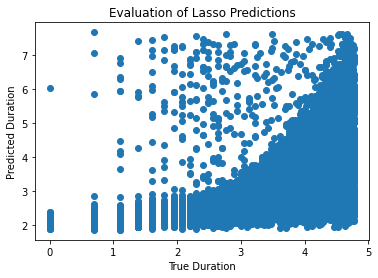

In [22]:
plt.scatter(y_test, dur_pipe.predict(X_test))
plt.xlabel('True Duration')
plt.ylabel('Predicted Duration')
plt.title('Evaluation of Lasso Predictions')

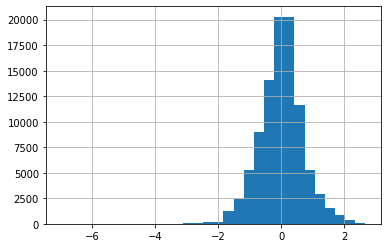

In [23]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

y_test.reset_index(drop=True, inplace=True)

preds = pd.Series(dur_pipe.predict(X_test))

errors = y_test - preds
errors.hist(bins=30)
plt.show()

In [25]:
joblib.dump(dur_pipe, 'dur_pipe.joblib')

['dur_pipe.joblib']